In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# Preprocess the data
max_len = 250  # Maximum sequence length
train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)

In [5]:
# Reshape the labels for binary classification
train_labels = train_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

In [6]:
# Define a function to create and compile models
def create_model(num_hidden_layers=2, num_hidden_units=16, loss_function='binary_crossentropy', activation_function='relu'):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(10000, 16, input_length=max_len))

    # Add hidden layers
    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(num_hidden_units, activation=activation_function))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

    return model

In [7]:
# Experiment with different configurations
configurations = [
    (2, 16, 'binary_crossentropy', 'relu'),
    (1, 32, 'binary_crossentropy', 'relu'),
    (3, 64, 'mse', 'tanh')
]

In [8]:
for num_layers, num_units, loss_function, activation_function in configurations:
    print(f"Experimenting with {num_layers} hidden layer(s), {num_units} hidden units, loss: {loss_function}, activation: {activation_function}")

    model = create_model(num_layers, num_units, loss_function, activation_function)

    # Train the model
    history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(test_data, test_labels)
    print(f"Test accuracy: {test_acc}\n")

Experimenting with 2 hidden layer(s), 16 hidden units, loss: binary_crossentropy, activation: relu
Epoch 1/10
625/625 - 4s - loss: 0.6875 - accuracy: 0.5305 - val_loss: 0.6833 - val_accuracy: 0.5408 - 4s/epoch - 7ms/step
Epoch 2/10
625/625 - 3s - loss: 0.6827 - accuracy: 0.5404 - val_loss: 0.6829 - val_accuracy: 0.5412 - 3s/epoch - 4ms/step
Epoch 3/10
625/625 - 3s - loss: 0.6820 - accuracy: 0.5403 - val_loss: 0.6828 - val_accuracy: 0.5411 - 3s/epoch - 4ms/step
Epoch 4/10
625/625 - 3s - loss: 0.6817 - accuracy: 0.5406 - val_loss: 0.6828 - val_accuracy: 0.5412 - 3s/epoch - 4ms/step
Epoch 5/10
625/625 - 3s - loss: 0.6817 - accuracy: 0.5408 - val_loss: 0.6827 - val_accuracy: 0.5411 - 3s/epoch - 5ms/step
Epoch 6/10
625/625 - 3s - loss: 0.6816 - accuracy: 0.5384 - val_loss: 0.6828 - val_accuracy: 0.5399 - 3s/epoch - 4ms/step
Epoch 7/10
625/625 - 3s - loss: 0.6815 - accuracy: 0.5411 - val_loss: 0.6827 - val_accuracy: 0.5399 - 3s/epoch - 4ms/step
Epoch 8/10
625/625 - 3s - loss: 0.6815 - accura

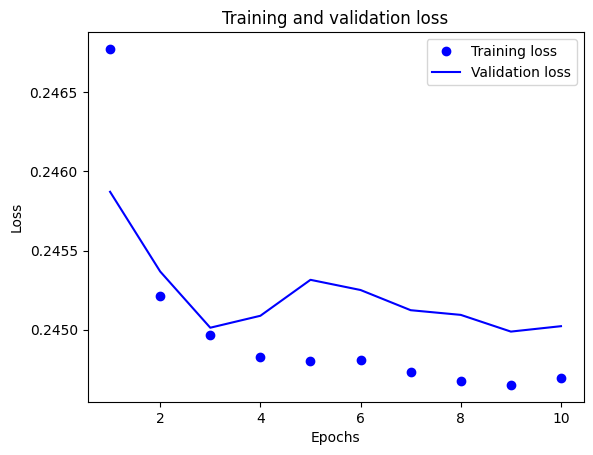

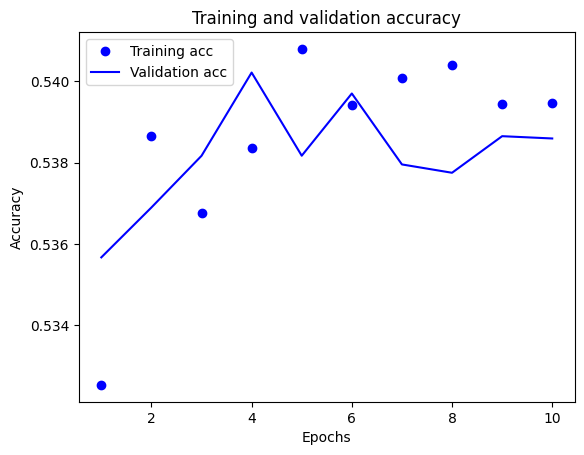

Epoch 1/4
49/49 [==============================] - 1s 4ms/step - loss: 143.3367 - accuracy: 0.5030
Epoch 2/4
49/49 [==============================] - 0s 3ms/step - loss: 34.6556 - accuracy: 0.5082
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 11.1484 - accuracy: 0.5102
Epoch 4/4
782/782 [==============================] - 1s 961us/step - loss: 2.3219 - accuracy: 0.5005


[2.3218798637390137, 0.5004799962043762]

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(train_data, train_labels, epochs=4, batch_size=512)  # Corrected variable names
results = model.evaluate(test_data, test_labels)  # Corrected variable names
results
